In [1]:
import psycopg2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

import seaborn as sns
import datetime

## Clean Outfielder Datasets

In [ ]:
#dfoutf1 (outfielder who played btwn 30 to 100 gms) = clutch_outf_30.csv
#dfoutf2 (outfielder whe played at least 100gms) = clutch_outf_100.csv
#dfoutf3 (outfielder who made atleast 5 allstar gms) = allstr_clutch_outf.csv

## Data Ingestion

In [2]:
import psycopg2 as p2
conn = p2.connect(database = 'player_stats', user ='baseball_master', password = 'georgetowndata', 
                  host = 'georgetown-baseball.cnfqonxqdbry.us-east-1.rds.amazonaws.com', 
                  port = '5432')

## Data sets created

In [10]:
#dfoutf1 = pd.read_csv('clutch_outf_30.csv', index_col=0)
#dfoutf2 = pd.read_csv('clutch_outf_100.csv', index_col=0)
dfoutf3 = pd.read_csv('allstr_clutch_outf.csv', index_col=0)

In [11]:
#Clear data set of NaN values
#dfoutf1 = dfoutf1.fillna(0)
#dfoutf2 = dfoutf2.fillna(0)
dfoutf3 = dfoutf3.fillna(0)

In [20]:
#dfoutf1.head()
#dfoutf2.head()
dfoutf3.head()

,yearID,playerID,event_count,average_win_change,clutch_win_change,POS,G_x,nameFirst,nameLast,birthYear,...,R,HR,RBI,AVG,1B,TB,SLG,OBP,OPS,RC
0,1950.0,ashburi01,653.0,0.011982,-0.014441,OF,147.0,Richie,Ashburn,1927.0,...,84.0,2.0,41.0,0.303030,141.0,191.0,0.321549,0.371775,0.693324,71.009105
1,1950.0,dimagdo01,615.0,0.010802,-0.009664,OF,140.0,Dom,DiMaggio,1917.0,...,131.0,7.0,70.0,0.328231,152.0,212.0,0.360544,0.413947,0.774491,87.756677
2,1950.0,dimagjo01,580.0,0.015860,-0.018902,OF,137.0,Joe,DiMaggio,1914.0,...,114.0,32.0,122.0,0.300952,115.0,181.0,0.344762,0.394389,0.739151,71.384488
3,1950.0,dobyla01,624.0,0.017617,-0.020485,OF,140.0,Larry,Doby,1923.0,...,110.0,25.0,102.0,0.326044,134.0,184.0,0.365805,0.441516,0.807321,81.238880
4,1950.0,kinerra01,569.0,0.022151,-0.010648,OF,150.0,Ralph,Kiner,1922.0,...,112.0,47.0,118.0,0.272395,122.0,164.0,0.299817,0.407738,0.707555,66.869048


### Summary Statistics

In [13]:
dfoutf1[["AVG", "HR", "H", "TB", "SLG", "OPS", "OBP","BB","RC"]].describe()

,AVG,HR,H,TB,SLG,OPS,OBP,BB,RC
count,5661.000000,5661.000000,5661.000000,5661.000000,5661.000000,5661.000000,5661.000000,5661.000000,5661.000000
mean,0.250138,5.812754,57.248366,65.864688,0.287035,0.604476,0.317441,21.361774,21.739256
std,0.045715,6.018662,34.440415,40.044825,0.056085,0.100750,0.050809,15.623864,14.494603
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.228022,2.000000,32.000000,37.000000,0.259259,0.555237,0.291667,10.000000,11.165049
50%,0.252991,4.000000,52.000000,60.000000,0.290780,0.611229,0.320000,18.000000,19.012346
75%,0.276978,8.000000,77.000000,89.000000,0.320988,0.665741,0.347368,28.000000,29.577465
max,0.666667,47.000000,218.000000,244.000000,0.750000,1.333333,0.666667,121.000000,88.034091


In [15]:
dfoutf2[["AVG", "HR", "H", "TB", "SLG", "OPS", "OBP","BB","RC"]].describe()

,AVG,HR,H,TB,SLG,OPS,OBP,BB,RC
count,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000,3394.000000
mean,0.272237,14.837655,131.986741,151.581909,0.312536,0.652362,0.339826,47.668533,52.098008
std,0.031905,9.695505,35.608319,41.537599,0.038540,0.069585,0.036871,21.106135,16.757504
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.254363,7.000000,110.000000,125.000000,0.289488,0.611634,0.318182,33.000000,41.043043
50%,0.272200,13.000000,134.000000,155.000000,0.312359,0.651816,0.338548,45.000000,52.202451
75%,0.290829,21.000000,157.000000,180.000000,0.335443,0.692359,0.360278,60.000000,63.060269
max,1.000000,57.000000,240.000000,273.000000,1.000000,2.000000,1.000000,148.000000,112.951807


In [16]:
dfoutf3[["AVG", "HR", "H", "TB", "SLG", "OPS", "OBP","BB","RC"]].describe()

,AVG,HR,H,TB,SLG,OPS,OBP,BB,RC
count,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000
mean,0.297376,24.487179,161.942308,185.783654,0.341290,0.717007,0.375717,66.838141,70.156532
std,0.028981,12.774994,30.315937,35.126184,0.036197,0.069252,0.040252,27.164816,16.279489
min,0.202532,0.000000,13.000000,16.000000,0.226131,0.471253,0.240240,4.000000,4.298507
25%,0.277322,15.000000,143.000000,164.000000,0.315535,0.671680,0.351781,48.000000,59.437626
50%,0.298466,24.000000,163.000000,187.000000,0.340926,0.715673,0.374512,65.000000,70.374116
75%,0.316449,33.000000,183.000000,212.000000,0.364669,0.760368,0.397807,81.000000,81.318527
max,0.393795,73.000000,262.000000,281.000000,0.474940,1.035674,0.609400,232.000000,117.079646


## Data Exploration with Seaborn  

#### Leverage Pairplots to id trends in the data

In [12]:
import seaborn as sns
import numpy as np
%matplotlib inline

In [12]:
### Measure relationship btwn key stats [AVG, TB, HR, OPS, OBP, SLG, BB, 1B, 2B, 3B, RC]

### Outfielders who played at least 30 games

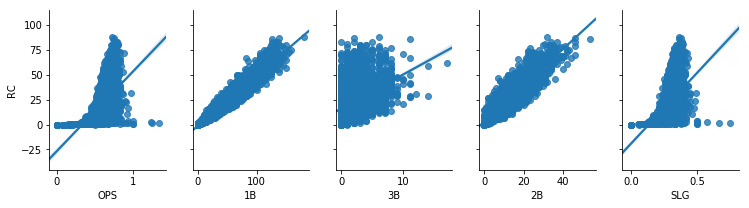

In [13]:
sns.pairplot(dfoutf1, x_vars = ['OPS','1B','3B','2B','SLG'], y_vars = 'RC', height = 3, aspect = 0.7, kind = 'reg')

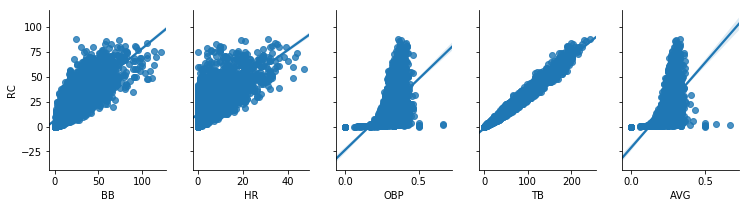

In [14]:
sns.pairplot(dfoutf1, x_vars = ['BB','HR','OBP','TB','AVG'], y_vars = 'RC', height = 3, aspect = 0.7, kind = 'reg')

### Outfielders who played at least 100 games

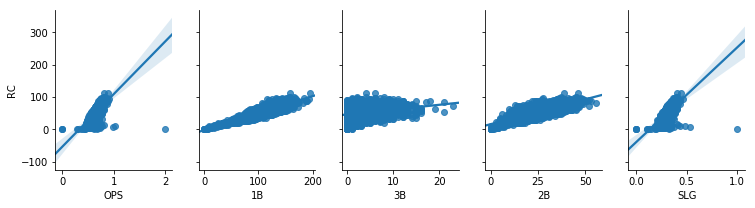

In [21]:
sns.pairplot(dfoutf2, x_vars = ['OPS','1B','3B','2B','SLG'], y_vars = 'RC', height = 3, aspect = 0.7, kind = 'reg')

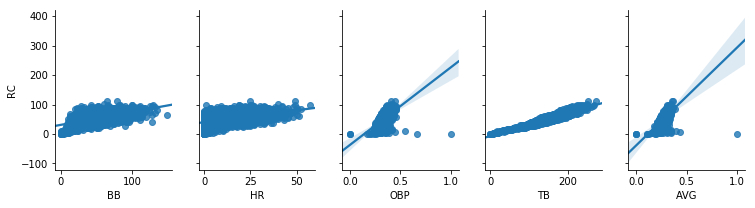

In [22]:
sns.pairplot(dfoutf2, x_vars = ['BB','HR','OBP','TB','AVG'], y_vars = 'RC', height = 3, aspect = 0.7, kind = 'reg')

### All Star Outfielders

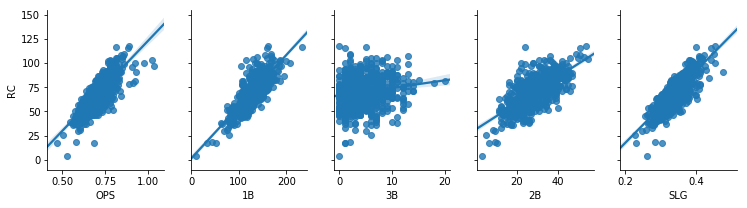

In [23]:
sns.pairplot(dfoutf3, x_vars = ['OPS','1B','3B','2B','SLG'], y_vars = 'RC', height = 3, aspect = 0.7, kind = 'reg')

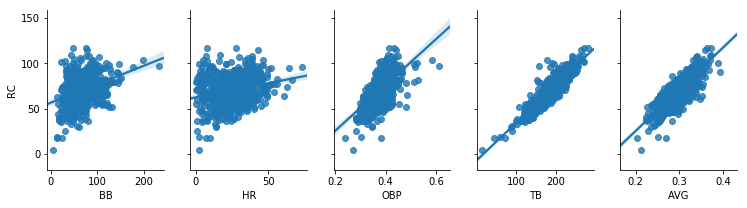

In [24]:
sns.pairplot(dfoutf3, x_vars = ['BB','HR','OBP','TB','AVG'], y_vars = 'RC', height = 3, aspect = 0.7, kind = 'reg')

## Machine Learning: Which Features can predict Runs Created (response)? 

### Outfielders who played at least 30 games

#### Create X = features and y = response

In [25]:
#What are the features? - AVG, HR, OPS, SLG, BB, 1B, 2B, 3B, H
#What is the response? - Runs Created

features = ['AVG', 'TB', 'HR', 'OPS', 'OBP', 'SLG', 'BB', '1B','2B','3B']
#response = 'RC' (Runs Created)

X = dfoutf1[features]
y = dfoutf1['RC']

#### Splitting X and y into training and testing sets

In [26]:
#Evaluate the Models
#from sklearn.cross.validation import train_test_split (Doesnt work)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 4)

In [27]:
#default split is 75% for training and 25% for test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4245, 10)
(1416, 10)
(4245,)
(1416,)


#### Linear Regression to train Model to learn

In [28]:
#import model
from sklearn.linear_model import LinearRegression

#instantiate
linreg = LinearRegression()

#fit the model to the training data(learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
### Interpreting model coefficents

#### Making Predictions

In [30]:
#make predictions on the X test data
y_pred = linreg.predict(X_test)

In [31]:
from sklearn import metrics

#### Root-Mean Sample Squared Error (Difference btwn Predicted and Test values)

In [32]:
#Outfielders with at least 30 gms
#Computing the RMSE for Runs Created
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.8808170482273574


In [33]:
#dfoutf1 = 1.88  with all 10 features (Outfielders with atleast 30 gms)

### Outfielders who played at least 100 games

#### Create X = features and y = response

In [34]:
features = ['AVG', 'TB', 'HR', 'OPS', 'OBP', 'SLG', 'BB', '1B','2B','3B']
#response = 'RC' (Runs Created)

X = dfoutf2[features]
y = dfoutf2['RC']

#### Splitting X and y into training and testing sets

In [35]:
#Evaluate the Models
#from sklearn.cross.validation import train_test_split (Doesnt work)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 4)

In [36]:
#default split is 75% for training and 25% for test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2545, 10)
(849, 10)
(2545,)
(849,)


#### Linear Regression to train Model to learn

In [37]:
#import model
from sklearn.linear_model import LinearRegression

#instantiate
linreg = LinearRegression()

#fit the model to the training data(learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Making Predictions

In [38]:
#make predictions on the X test data
y_pred = linreg.predict(X_test)

In [39]:
from sklearn import metrics

#### Root-Mean Sample Squared Error (Difference btwn Predicted and Test values)

In [40]:
#Outfielders with atleast 100 games
#Computing the RMSE for Runs Created
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

3.5817736025348457


### All Star Outfielders

#### Create X = features and y = response

In [41]:
features = ['AVG', 'TB', 'HR', 'OPS', 'OBP', 'SLG', 'BB', '1B','2B','3B']
#response = 'RC' (Runs Created)

X = dfoutf3[features]
y = dfoutf3['RC']

#### Splitting X and y into training and testing sets

In [42]:
#Evaluate the Models
#from sklearn.cross.validation import train_test_split (Doesnt work)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 4 )

In [43]:
#default split is 75% for training and 25% for test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(468, 10)
(156, 10)
(468,)
(156,)


#### Linear Regression to train Model to learn

In [44]:
#import model
from sklearn.linear_model import LinearRegression

#instantiate
linreg = LinearRegression()

#fit the model to the training data(learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Making Predictions

In [45]:
#make predictions on the X test data
y_pred = linreg.predict(X_test)

In [46]:
from sklearn import metrics

#### Root-Mean Sample Squared Error (Difference btwn Predicted and Test values)

In [47]:
#All Star Infielders.
#Computing the RMSE for Runs Created
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.1670932688916418


## Feature selection - Which are the underperforming features?

### Outfielders with atleast 30 games

#### Yellowbrick's Feature Rank Visualizer

In [48]:
features = ['AVG', 'TB', 'HR', 'OPS', 'OBP', 'SLG', 'BB', '1B','2B','3B']
#response = 'RC' (Runs Created)
X = dfoutf1[features]
y = ['RC']

In [49]:
from yellowbrick.features import Rank1D
visualizer = Rank1D(features = features, algorithm ='shapiro')

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()
/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: U

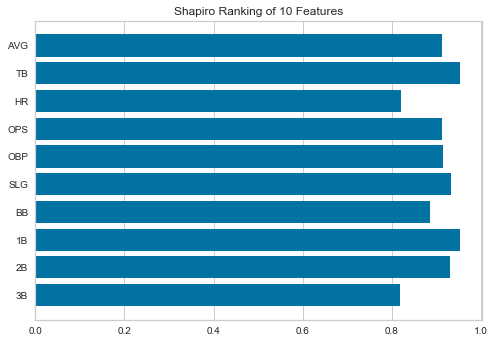

In [50]:
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

In [ ]:
# Features [HR, 3B, BB, AVG] ranked the worst

#### Yellowbrick's Feature Importance to futher verify Feature Importance

In [51]:
#Outfielders with atleast 30 games
#convert y from float to integer
y = dfoutf1.RC.astype(int) 

In [52]:
#Outfielders with atleast 30 games
#set X value for all 10 features
X = dfoutf1[features]

In [53]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from yellowbrick.features.importances import FeatureImportances
%matplotlib inline

In [54]:
fig = plt.figure()
ax = fig.add_subplot()
#ax = ax

<Figure size 432x288 with 0 Axes>

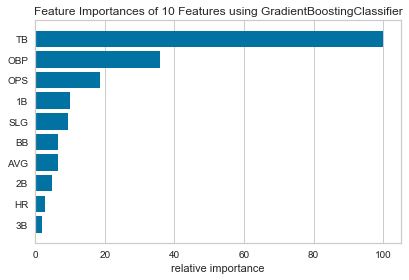

In [55]:
# Infielders with atleast 30 gms
# This model takes over 90 seconds to complete
# Features TB, OBP, and OPS are the most important (Signs of leakage)
viz = FeatureImportances(GradientBoostingClassifier(), ax = ax)
viz.fit(X,y)
viz.poof()

#### Yellowbrick's Feature Covariance 2D Rank heat map

In [56]:
#reset value of y to y = dfin1['RC']
y = dfoutf1['RC']
from yellowbrick.features import Rank2D
visualizer = Rank2D(features=features, algorithm = 'covariance')

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


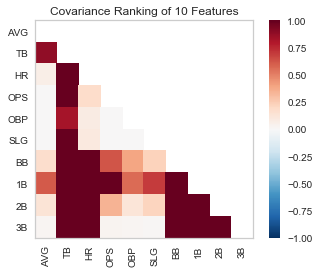

In [57]:
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

### Outfielders with atleast 100 games

#### Yellowbrick's Feature Rank Visualizer

In [58]:
features = ['AVG', 'TB', 'HR', 'OPS', 'OBP', 'SLG', 'BB', '1B','2B','3B']
#response = 'RC' (Runs Created)
X = dfoutf2[features]
y = ['RC']

In [59]:
from yellowbrick.features import Rank1D
visualizer = Rank1D(features = features, algorithm ='shapiro')

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


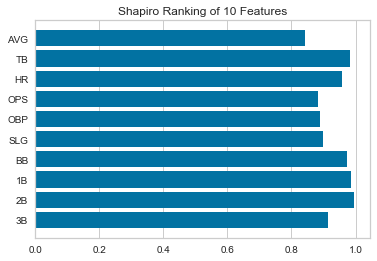

In [60]:
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

#### Yellowbrick's Feature Importance to futher verify Feature Importance

In [61]:
#Outfielders with atleast 100 games
#convert y from float to integer
y = dfoutf2.RC.astype(int) 

In [62]:
X = dfoutf2[features]

In [63]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from yellowbrick.features.importances import FeatureImportances
%matplotlib inline

In [64]:
fig = plt.figure()
ax = fig.add_subplot()
#ax = ax

<Figure size 432x288 with 0 Axes>

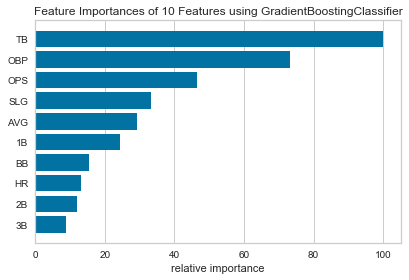

In [65]:
#Outfielders with atleast 30 gms
#This model takes over 90 seconds to complete
#Features TB, OBP, and OPS are the most important (Signs of leakage)# 
viz = FeatureImportances(GradientBoostingClassifier(), ax = ax)
viz.fit(X,y)
viz.poof()

#### Yellowbrick's Feature Covariance 2D Rank heat map

In [66]:
#reset value of y to y = dfoutf2['RC']
y = dfoutf2['RC']
from yellowbrick.features import Rank2D
visualizer = Rank2D(features=features, algorithm = 'covariance')

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


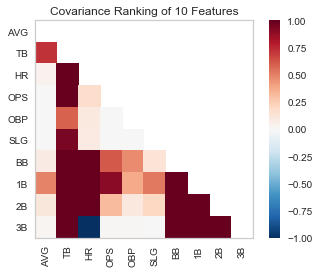

In [67]:
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

### Allstar Outfielders

#### Yellowbrick's Feature Rank Visualizer

In [68]:
features = ['AVG', 'TB', 'HR', 'OPS', 'OBP', 'SLG', 'BB', '1B','2B','3B']
#response = 'RC' (Runs Created)
X = dfoutf3[features]
y = ['RC']

In [69]:
from yellowbrick.features import Rank1D
visualizer = Rank1D(features = features, algorithm ='shapiro')

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


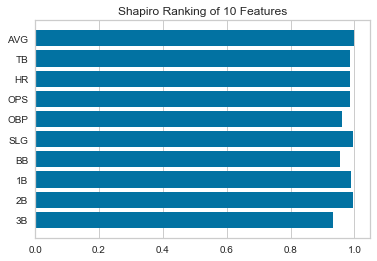

In [70]:
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

#### Yellowbrick's Feature Importance to futher verify Feature Importance

In [71]:
#convert y from float to integer
y = dfoutf3.RC.astype(int) 

In [72]:
X = dfoutf3[features]

In [73]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from yellowbrick.features.importances import FeatureImportances
%matplotlib inline

In [74]:
fig = plt.figure()
ax = fig.add_subplot()
#ax = ax

<Figure size 432x288 with 0 Axes>

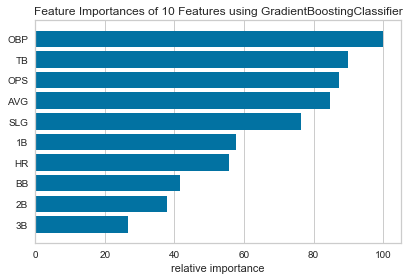

In [75]:
#All Star Outfielders
#This model takes over 90 seconds to complete
#Features TB, OBP, and OPS are the most important (Signs of leakage)
viz = FeatureImportances(GradientBoostingClassifier(), ax = ax)
viz.fit(X,y)
viz.poof()

#### Yellowbrick's Feature Covariance 2D Rank heat map

In [76]:
#reset value of y to y = dfin3['RC']
y = dfoutf3['RC']
from yellowbrick.features import Rank2D
visualizer = Rank2D(features=features, algorithm = 'covariance')

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


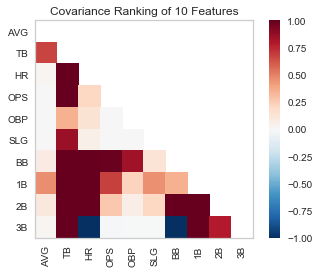

In [77]:
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

## Prediction and Error Plotting

### Outfielders with atleast 30 games

In [78]:
#Reset X and y values
features = ['AVG', 'TB', 'HR', 'OPS', 'OBP', 'SLG', 'BB', '1B','2B','3B']
X = dfoutf1[features]
y = dfoutf1['RC']

#### Ridge Regression - R2 Score

In [79]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score

In [80]:

X_train, X_test, y_train, y_test = tts(X,y, random_state = 4, test_size = .2)

#want to first train the model on test data because if the model memorizes the training data and then evaluates, it will overfit
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

r2 = r2_score(y_test, y_hat)

print(r2)

0.9711886458580246


In [81]:
#score to high = overfitted. Must remove features and add noise

In [82]:
#removed TB, OPS, OBP, SLG, '2B'
features = ['AVG','HR','BB', '1B','3B']

In [83]:
X= dfout1[features]

In [84]:
X_train, X_test, y_train, y_test = tts(X,y, random_state = 4, test_size = .2)
#want to first train the model on test data because if the model memorizes the training data and then evaluates, it will overfit
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

r2 = r2_score(y_test, y_hat)

print(r2)

0.9317837348882216


#### Retry with adding noise to features

In [85]:
#add noise to features
features = ['AVG','HR','BB','1B','3B','W', 'G_x', 'birthYear']

In [86]:
#Re-try with removed features
X_train, X_test, y_train, y_test = tts(X,y, random_state = 4, test_size = .2)
#want to first train the model on test data because if the model memorizes the training data and then evaluates, it will overfit
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

r2 = r2_score(y_test, y_hat)

print(r2)

0.9317837348882216


#### Lasso Regression -R2 Score

In [92]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score

In [87]:
#Re-set X with reduced features
features = ['AVG','HR','BB', '1B','3B']
X= dfoutf1[features]
y = dfoutf1['RC']

In [88]:

X_train, X_test, y_train, y_test = tts(X,y, random_state = 4, test_size = .2)
#want to first train the model on test data because if the model memorizes the training data and then evaluates, it will overfit
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

r2 = r2_score(y_test, y_hat)

print(r2)

0.9317837348882216


### Re-measure importance of reduced feautures

In [89]:
features = ['AVG','HR','BB', '1B','3B']
X= dfoutf1[features]
y = dfoutf1['RC']

In [90]:
from yellowbrick.features import Rank1D
visualizer = Rank1D(features = features, algorithm ='shapiro')

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()
/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: U

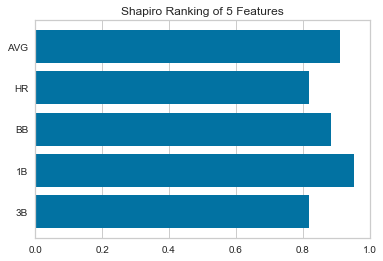

In [91]:
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

In [158]:
#convert y from float to integer
y = dfoutf1.RC.astype(int) 

In [159]:
X = dfoutf1[features]

In [97]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from yellowbrick.features.importances import FeatureImportances
%matplotlib inline

In [98]:
fig = plt.figure()
ax = fig.add_subplot()

<Figure size 432x288 with 0 Axes>

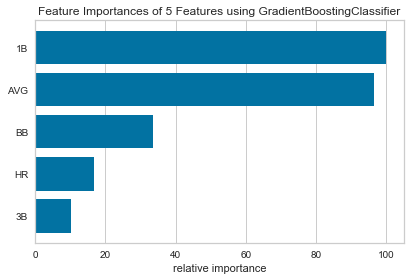

In [99]:
#Model takes over 90 seconds to calculate
viz = FeatureImportances(GradientBoostingClassifier(), ax = ax)
viz.fit(X,y)
viz.poof()

In [100]:
#reset value of y to y = dfoutf1['RC']
y = dfoutf1['RC']
from yellowbrick.features import Rank2D
visualizer = Rank2D(features=features, algorithm = 'covariance')

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


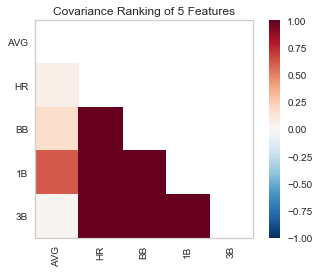

In [101]:
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

## Data Visualization

### Outfielders with at least 30 gms

#### Visualize Plot Error

In [102]:
#Train Model again

from sklearn.model_selection import train_test_split
data = dfoutf1
features = ['AVG','HR','BB', '1B','3B']
X = dfoutf1[features]
y = dfoutf1['RC']


In [103]:
#Create the train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Ridge Regression R2 Score

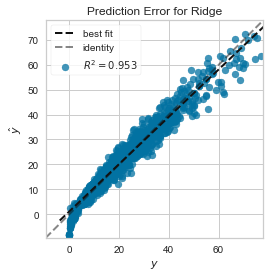

In [104]:
from sklearn.linear_model import Ridge

from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
Ridge = Ridge()
visualizer = PredictionError(Ridge)#, ##size = (1080,720), legend_size = 3))
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof() 

#### Lasso Regression R2 Score

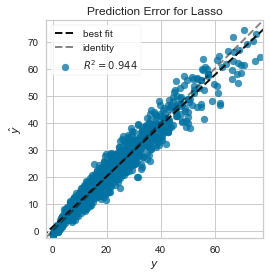

In [105]:
from sklearn.linear_model import Lasso

from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
Lasso = Lasso()
visualizer = PredictionError(Lasso)#, ##size = (1080,720), legend_size = 3))
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof() 

#### Ridge - Residual Plots

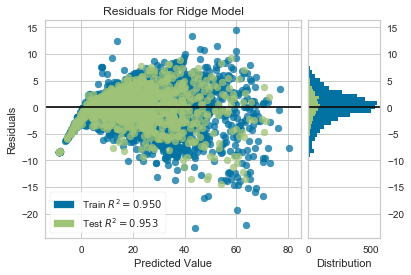

In [110]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

Ridge = Ridge()
visualizer = ResidualsPlot(Ridge)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()
 

#### Lasso - Resdiual Plots

In [111]:
from sklearn.linear_model import Lasso
from yellowbrick.regressor import ResidualsPlot

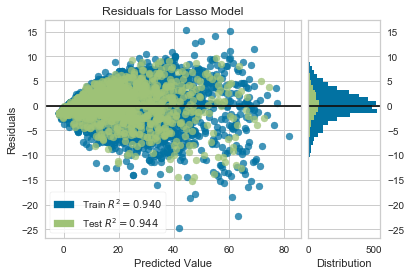

In [112]:
Lasso = Lasso()
visualizer = ResidualsPlot(Lasso)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()

## Prediction and Error Plotting

### Outfielders with atleast 100 games

In [113]:
#Reset X and y values
features = ['AVG','HR','BB', '1B','3B']
X = dfoutf2[features]
y = dfoutf2['RC']

#### Ridge Regression -R2 Score

In [114]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score

In [115]:

X_train, X_test, y_train, y_test = tts(X,y, random_state = 4, test_size = .2)

#want to first train the model on test data because if the model memorizes the training data and then evaluates, it will overfit
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

r2 = r2_score(y_test, y_hat)

print(r2)

0.8760228567331423


#### Lasso Regression -R2 Score

In [117]:

X_train, X_test, y_train, y_test = tts(X,y, random_state = 4, test_size = .2)
#want to first train the model on test data because if the model memorizes the training data and then evaluates, it will overfit
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

r2 = r2_score(y_test, y_hat)

print(r2)

0.8760228567331423


### Re-measure importance of reduced feautures

In [125]:
features = ['AVG','HR','BB', '1B','3B']
X= dfoutf2[features]
y = dfoutf2['RC']

In [126]:
from yellowbrick.features import Rank1D
visualizer = Rank1D(features = features, algorithm ='shapiro')

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


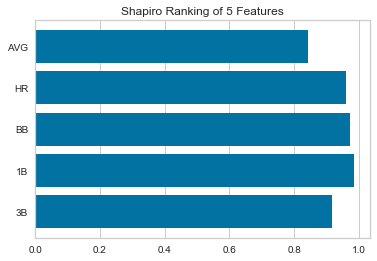

In [127]:
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

In [128]:
#convert y from float to integer
y = dfoutf2.RC.astype(int) 

In [129]:
X = dfoutf2[features]

In [130]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from yellowbrick.features.importances import FeatureImportances
%matplotlib inline

In [131]:
fig = plt.figure()
ax = fig.add_subplot()
#ax = ax

<Figure size 432x288 with 0 Axes>

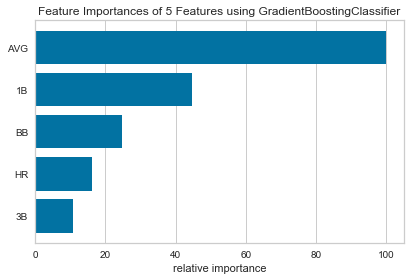

In [132]:
#This takes over 90 seconds to run
#Features TB, OBP, and OPS are the most important
viz = FeatureImportances(GradientBoostingClassifier(), ax = ax)
viz.fit(X,y)
viz.poof()

In [133]:
#reset value of y to y = dfoutf2['RC']
y = dfoutf2['RC']
from yellowbrick.features import Rank2D
visualizer = Rank2D(features=features, algorithm = 'covariance')

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


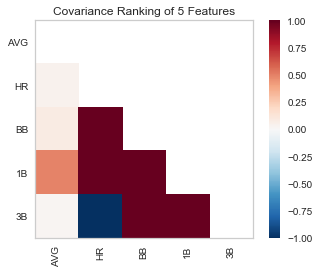

In [134]:
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

## Data Visualization

### Outfielders with at least 100 gms

#### Visualize Plot Error

In [135]:
#Train Model again

from sklearn.model_selection import train_test_split
data = dfoutf2
features = ['AVG','HR','BB', '1B','3B']
X = dfoutf2[features]
y = dfoutf2['RC']

In [136]:
#Create and train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Ridge Regression R2 Score

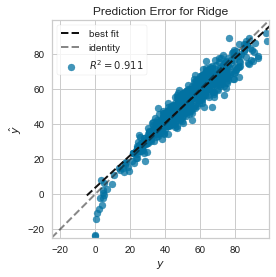

In [137]:
from sklearn.linear_model import Ridge

from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
Ridge = Ridge()
visualizer = PredictionError(Ridge)#, ##size = (1080,720), legend_size = 3))
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof() 

#### Lasso Regression R2 Score

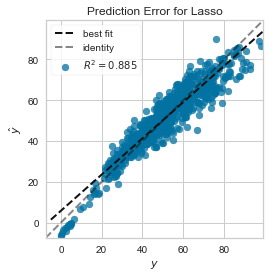

In [138]:
from sklearn.linear_model import Lasso

from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
Lasso = Lasso()
visualizer = PredictionError(Lasso)#, ##size = (1080,720), legend_size = 3))
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof() 

#### Ridge - Residual Plots

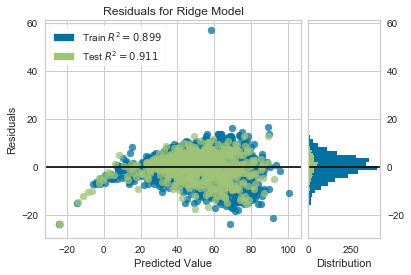

In [139]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

Ridge = Ridge()
visualizer = ResidualsPlot(Ridge)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()
 

#### Lasso - Residual Plots

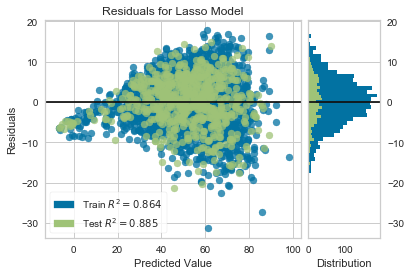

In [140]:
from sklearn.linear_model import Lasso
from yellowbrick.regressor import ResidualsPlot

Lasso = Lasso()
visualizer = ResidualsPlot(Lasso)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()

## Prediction and Error Plotting

### All Star Outfielders 

In [141]:
#Reset X and y values
features = ['AVG','HR','BB', '1B','3B']
X = dfoutf3[features]
y = dfoutf3['RC']

#### Ridge Regression - R2 Score

In [142]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score

In [143]:

X_train, X_test, y_train, y_test = tts(X,y, random_state = 4, test_size = .2)

#want to first train the model on test data because if the model memorizes the training data and then evaluates, it will overfit
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

r2 = r2_score(y_test, y_hat)

print(r2)

0.7911976330680205


#### Lasso Regression -R2 Score

In [144]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score

In [145]:

X_train, X_test, y_train, y_test = tts(X,y, random_state = 4, test_size = .2)
#want to first train the model on test data because if the model memorizes the training data and then evaluates, it will overfit
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

r2 = r2_score(y_test, y_hat)

print(r2)

0.7911976330680205


### Re-measure importance of reduced feautures

In [146]:
features = ['AVG','HR','BB','1B','3B']
X= dfoutf3[features]
y = dfoutf3['RC']

In [147]:
from yellowbrick.features import Rank1D
visualizer = Rank1D(features = features, algorithm ='shapiro')

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


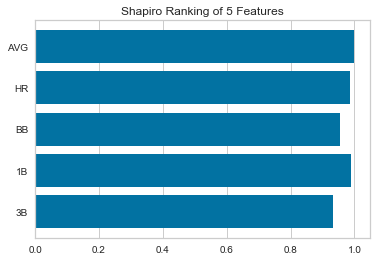

In [148]:
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

In [150]:
#convert y from float to integer
y = dfoutf3.RC.astype(int) 

In [151]:
X = dfoutf3[features]

In [152]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from yellowbrick.features.importances import FeatureImportances
%matplotlib inline

In [153]:
fig = plt.figure()
ax = fig.add_subplot()
#ax = ax

<Figure size 432x288 with 0 Axes>

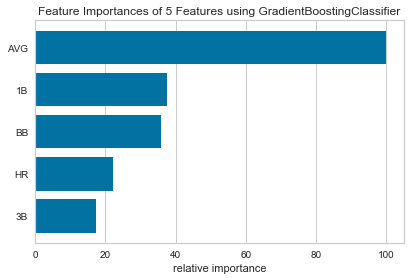

In [154]:
#This model takes over 90 seconds to run
viz = FeatureImportances(GradientBoostingClassifier(), ax = ax)
viz.fit(X,y)
viz.poof()

In [155]:
#reset value of y to y = dfoutf3['RC']
y = dfoutf3['RC']
from yellowbrick.features import Rank2D
visualizer = Rank2D(features=features, algorithm = 'covariance')

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


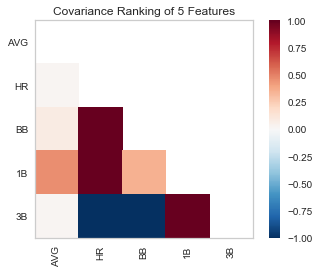

In [156]:
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

## Data Visualization

### All Star Outfielders 

#### Visualize Plot Error

In [118]:
#Train Model again

from sklearn.model_selection import train_test_split
data = dfoutf3
features = ['AVG','HR','BB', '1B','3B']
X = dfoutf3[features]
y = dfoutf3['RC']

In [119]:
#Create and train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Ridge Regression R2 Score

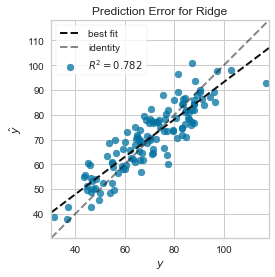

In [120]:
from sklearn.linear_model import Ridge

from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
Ridge = Ridge()
visualizer = PredictionError(Ridge)#, ##size = (1080,720), legend_size = 3))
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof() 

#### Lasso Regression R2 Score

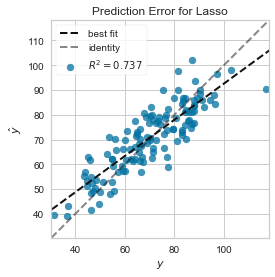

In [121]:
from sklearn.linear_model import Lasso

from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
Lasso = Lasso()
visualizer = PredictionError(Lasso)#, ##size = (1080,720), legend_size = 3))
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof() 

#### Ridge - Residual Plots

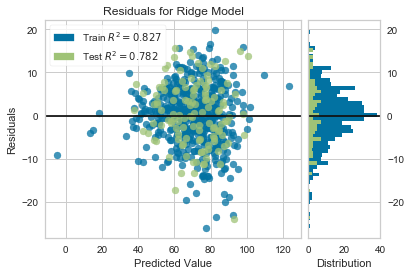

In [122]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

Ridge = Ridge()
visualizer = ResidualsPlot(Ridge)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()
 

#### Lasso - Residual Plots

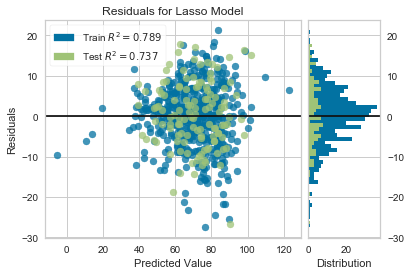

In [123]:
from sklearn.linear_model import Lasso
from yellowbrick.regressor import ResidualsPlot

Lasso = Lasso()
visualizer = ResidualsPlot(Lasso)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()